# Fiber Section Visualization

In [1]:
import numpy as np
import openseespy.opensees as ops
from opstool import load_ops_examples
from opstool.vis import GetFEMdata, FiberSecVis

Here we load a single-degree-of-freedom example.
This SDOF model consists of a fixed node and a free node connected by a zero-length link element using a circular fiber cross-section.

In [2]:
load_ops_examples("SDOF")

## Visualization of fiber section geometry information

In [8]:
FEMdata = GetFEMdata()

FEMdata.get_fiber_data(ele_sec=[(1, 1)], save_file='FiberData.hdf5')

Fiber section data saved in opstool_output/FiberData.hdf5!


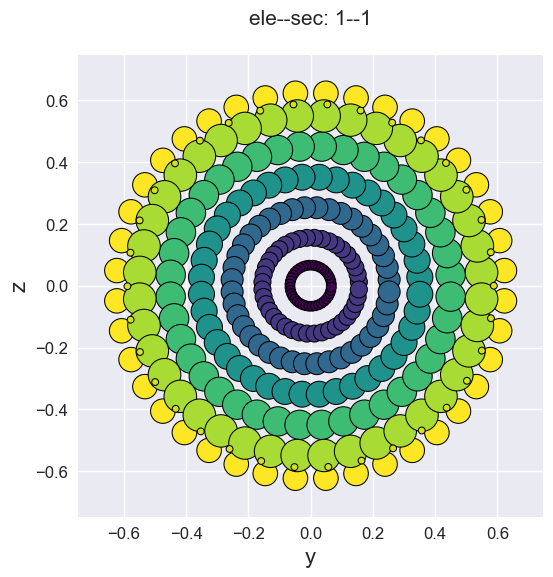

In [9]:
secvis = FiberSecVis(ele_tag=1, sec_tag=1, opacity=1, colormap='viridis')

secvis.sec_vis(input_file='FiberData.hdf5')

Of course, you can also use a custom color ``dict``, where the keys are the **OpenSeesPy material tags** in the cross section and the values are any ``matplotlib`` supported color labels.

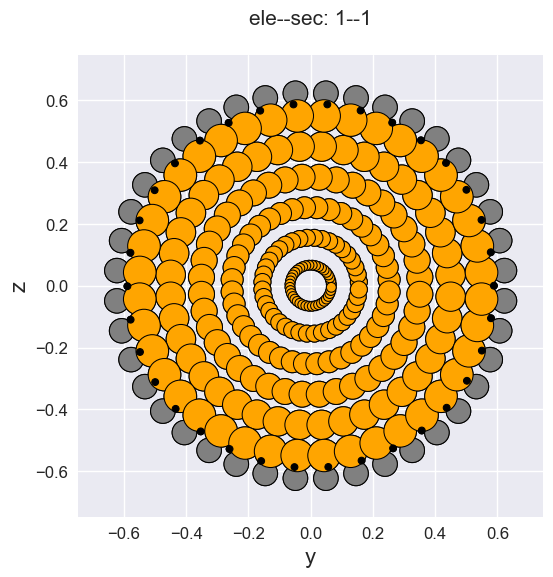

In [10]:
secvis.sec_vis(input_file='FiberData.hdf5',
               mat_color={1: 'gray', 2: 'orange', 3: 'black'})

## Fiber section responses visualization

applying the dynamic load

In [6]:
# --------------------------------------------------
# dynamic load
ops.rayleigh(0.0, 0.0, 0.0, 0.000625)
ops.loadConst('-time', 0.0)

# applying Dynamic Ground motion analysis
dt = 0.02
ttot = 5
npts = int(ttot / dt)
x = np.linspace(0, ttot, npts)
data = np.sin(2 * np.pi * x)
ops.timeSeries('Path', 2, '-dt', dt, '-values', *data, '-factor', 9.81)
# how to give accelseriesTag?
ops.pattern('UniformExcitation', 2, 1, '-accel', 2)
# how to give accelseriesTag?
ops.pattern('UniformExcitation', 3, 2, '-accel', 2)

ops.wipeAnalysis()
ops.system('BandGeneral')
# Create the constraint handler, the transformation method
ops.constraints('Transformation')
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer('RCM')
ops.test('NormDispIncr', 1e-8, 10)
ops.algorithm('Linear')
ops.integrator('Newmark', 0.5, 0.25)
ops.analysis('Transient')

In [11]:
for i in range(npts):
    ops.analyze(1, dt)
    FEMdata.get_fiber_resp_step(num_steps=npts,
                                total_time=100000000000,
                                stop_cond=False,
                                save_file="FiberRespStepData-1.hdf5")

Fiber section responses data saved in opstool_output/FiberRespStepData-1.hdf5!


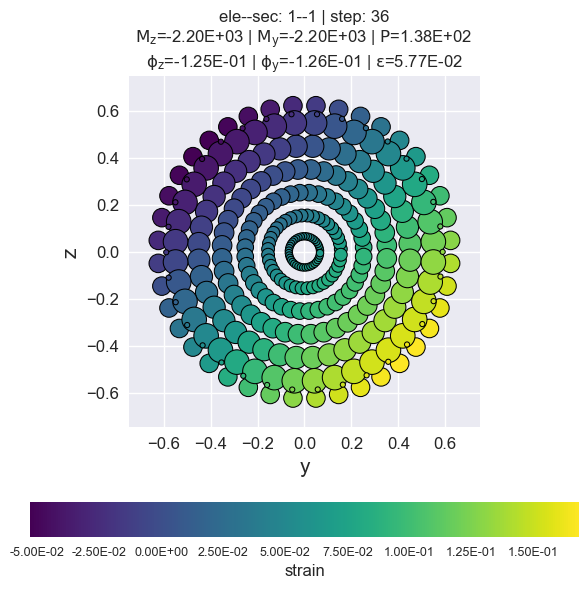

In [12]:
secvis.resp_vis(input_file="FiberRespStepData-1.hdf5",
                step=None,
                show_variable='strain',
                show_mats=[1, 2, 3],)

stress of rebars by matTag 3

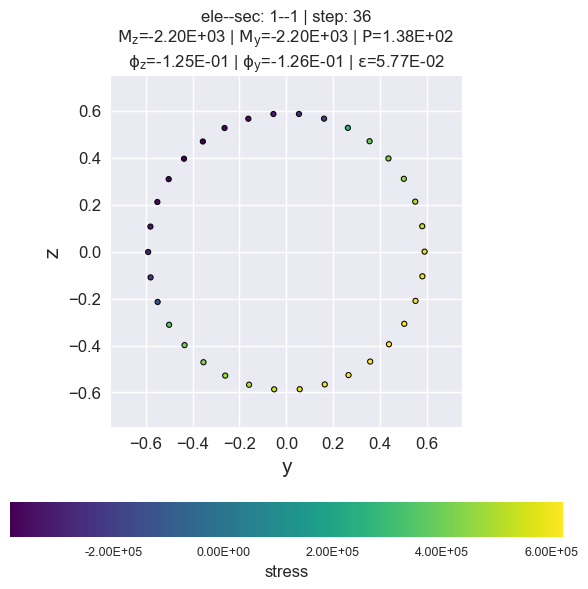

In [13]:
secvis.resp_vis(input_file="FiberRespStepData-1.hdf5",
                step=None,
                show_variable='stress',
                show_mats=[3],)

Generate animated gif files.

In [ ]:
secvis.animation(input_file="FiberRespStepData-1.hdf5",
                 output_file='images/sec1-1.gif',
                 show_variable='strain',
                 show_mats=[1, 2, 3],
                 framerate=10)